앙상블이란?
- 통일, 조화를 의미
- 여러가지 동일한 종류 혹은 상이한 모형들의 예측/ 분류 결과를 종합하여 최종적인 의사결정에 사용

장점은?
- 다양한 모형의 예측 결과를 결합함으로써 단일 모형으로 분석했을 때 보다 신뢰성 높은 예측값을 얻는 것
- Weak learner를 결합한다면, Single learner보다 더 나은 성능을 얻을 수 있다는 아이디어

<img src="http://www.birc.co.kr/wp-content/uploads/2017/01/errorrate.png">

조건은? 
- 각각 분류기가 상호 독립적이여야 함
- 각각 오분류율은 50% 보다는 낮아야 함

앙상블 모형의 종류는?

1) 데이터를 조정하는 방법

– 적절한 표본추출 방법을 활용하여 여러 개의 훈련용 데이터 집합을 생성함
– 각각의 데이터 집합을 활용하여 여러 개의 분류기를 생성하여 앙상블을 진행
(Bagging, Boosting)

2) 변수의 개수를 조절하는 방법(Random Forest)

– 전체 변수집합에서 부분 변수집합을 선택하여 훈련용 데이터 생성
– 각각의 데이터 집합에 대해 분류기를 생성한 후 앙상블을 진행

3) 집단명을 조절하는 방법

– 집단의 종류가 많은 경우 소수의 집단만으로 묶어서 분류
– 각 집단에 소속되는지에 대한 여부만 분류하는 분류기를 생성하여 앙상블 모형에 적용

4) 분류모형의 가정을 조절하는 방법

– 하나의 분류모형은 모수에 대한 가정 또는 알고리즘에 대한 가정에 따라 상이해짐
– 모수 및 가정을 변경하여 여러 개의 모형을 생성하여 앙상블을 진행

출처 : https://swalloow.github.io/bagging-boosting

# Bagging

<img src = "https://swalloow.github.io/assets/images/boosting.png">


대상 (input sample)에 대해서 복원 랜덤 샘플링을 진행한다.

이렇게 추출한 데이터가 일종의 표본 집단이 된다.
여기에 동일한 모델을 학습시킨다. (보통 Bagging 알고리즘으로 RandomForest 모델이 있다. Decision Tree Model은 boundary가 discrete한 모양)

그리고 학습된 모델의 예측변수들을 집계해서 그 결과로 모델을 생성해낸다.

이러한 방식을 Bootstrap Aggregating라고 부른다.

여기서 나타나는 오류 2가지
- 높은 bias로 인한 underfitting
- 높은 variance로 인한 overfitting

<img src = "https://i.imgur.com/jFfarvo.png">


<randomForest 모델>

<img src ="https://swalloow.github.io/assets/images/agg_result.png">

집계방식
- categorical Data -> voting (투표방식)
- continuous Data -> Average (평균)

Scikit-Learn 의 ensemble 서브패키지는 배깅 모형 결합을 위한 BaggingClassifier 클래스를 제공한다. 사용법은 다음과 같다.  

- base_estimator: 기본 모형  
- n_estimators: 모형 갯수. 디폴트 10  
- bootstrap: 데이터의 중복 사용 여부. 디폴트 True  
- max_samples: 데이터 샘플 중 선택할 샘플의 수 혹은 비율. 디폴트 1.0  
- bootstrap_features: 특징 차원의 중복 사용 여부. 디폴트 False  
- max_features: 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 1.0  

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import numpy as np


# 한글 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

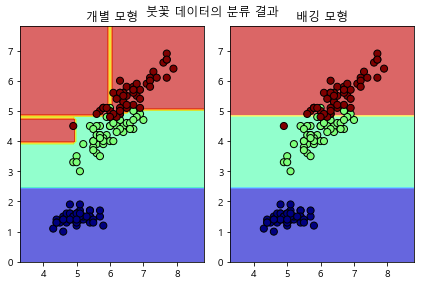

In [7]:
# 그림으로 이해하기

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

# moons 데이터셋에 앙상블 적용하기

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# 단 하나의 decision tree 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42) #디시젼 한가지만 이용
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred_tree))

Accuracy = 0.856


In [12]:
#bagging 사용한 앙상블 학습

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier( #배깅을 사용하여 디시젼 이용
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred))

Accuracy = 0.904


아래의 그림은 하나의 의사결정나무에 대한 결정 경계(decision boundary)와 배깅을 이용한 앙상블 트리에 대한 결정 경계를 비교한 그래프이다. 그래프에서도 확인할 수 있듯이 앙상블 학습이 일반화(generalization)이 더 잘 된것을 알 수 있다.

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

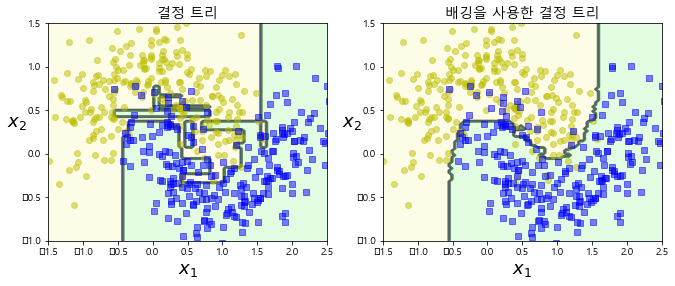

In [14]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("결정 트리", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("배깅을 사용한 결정 트리", fontsize=14)
plt.show()

# Boosting

bagging이 일반적인 모델을 만드는데 집중이 되어있다면, Boosting은 맞추기 어려운 문제를 맞추는데 초점이 맞추어져 있다.

ex) 수학 문제를 푸는데 9번 문제가 어려워서 계속 틀렸다고 가정을 해보자.

Boosting 방식은 9번 문제에 가중치를 부여해서 9번 문제를 잘 맞춘 모델을 최종 모델로 선정한다.

<img src ="https://quantdare.com/wp-content/uploads/2016/04/bb3.png">

Boosting도 Bagging과 동일하게 복원 랜덤 샘플링을 하지만, "가중치를 부여한다는 차이점"이 있다.

Bagging은 병렬로 학습하는 반면, Boosting은 순차적으로 학습시킨다.

학습이 끝나면 결과에 따라서 가중치가 재분배된다.
따라서, 오답에 더욱 집중할 수 있게되는것이다.

- 사용하는 모델로는 AdaBoost, XGBoost, GradientBoost등이 있다.
- 보통은 XGBoost를 사용한다.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# 한글 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Stacking

Stacking
Meta Modeling 이라고 불리기도 하는 이 방법은 위의 2가지 방식과는 조금 다릅니다. “Two heads are better than one” 이라는 아이디어에서 출발합니다.

Stacking은 서로 다른 모델들을 조합해서 최고의 성능을 내는 모델을 생성합니다. 여기에서 사용되는 모델은 SVM, RandomForest, KNN 등 다양한 알고리즘을 사용할 수 있습니다. 이러한 조합을 통해 서로의 장점은 취하고 약점을 보완할 수 있게 되는 것 입니다.

Stacking은 이미 느끼셨겠지만 필요한 연산량이 어마어마합니다. 적용해보고 싶다면 아래의 StackNet을 사용하시는 걸 강력하게 추천합니다.

https://github.com/kaz-Anova/StackNet

문제에 따라 정확도를 요구하기도 하지만, 안정성을 요구하기도 합니다. 따라서, 주어진 문제에 적절한 모델을 선택하는 것이 중요합니다.

# 이진분류데이터

In [3]:
X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])

In [5]:
y 

array([1, 1, 1, 2, 2, 2, 2])

In [6]:
X_new = [0, -1.5]

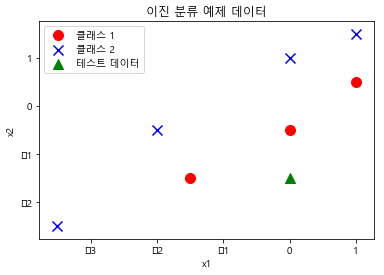

In [9]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="클래스 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="클래스 2")
plt.scatter(X_new[0], X_new[1], s=100, marker='^', c='g', label="테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("이진 분류 예제 데이터")
plt.legend()
plt.show()

이 문제를 세가지 다른 방식으로 풀어본다.

- 로지스틱 회귀 모형
- QDA 모형
- 가우시안 나이브베이즈 모형

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()

마지막으로 세가지 모형을 다수결로 합친 모형을 
VotingClassifier 클래스로 만든다.

In [12]:
from sklearn.ensemble import VotingClassifier #앙상블 모델

ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft') #soft 이용

In [14]:
probas = [c.fit(X, y).predict_proba([X_new]) for c in (model1, model2, model3, ensemble)] #proba를 이용해서 확률로 도출
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

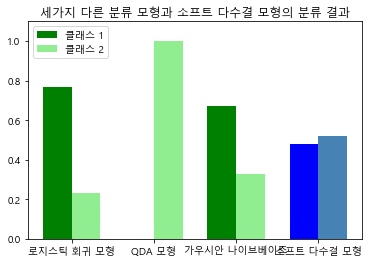

In [15]:
ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['로지스틱 회귀 모형', 'QDA 모형', '가우시안 나이브베이즈', '소프트 다수결 모형'])
plt.ylim([0, 1.1])
plt.title('세가지 다른 분류 모형과 소프트 다수결 모형의 분류 결과')
plt.legend([p1[0], p2[0]], ['클래스 1', '클래스 2'], loc='upper left')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


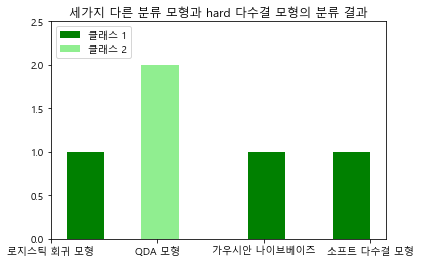

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='hard') #hard로 함

pred = [c.fit(X, y).predict([X_new]) for c in (model1, model2, model3, ensemble)]
pred
class1 = [pr[0] for pr in pred]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(0.5, class1[0], width, color='green')
p2 = plt.bar(1.2, class1[1], width, color='lightgreen')
p3 = plt.bar(2.2, class1[2], width, color='green')
p4 = plt.bar(3, class1[3], width, color='green')

plt.xticks(ind + 0.5 * width, ['로지스틱 회귀 모형', 'QDA 모형', '가우시안 나이브베이즈', '소프트 다수결 모형'])
plt.ylim([0, 2.5])
plt.title('세가지 다른 분류 모형과 hard 다수결 모형의 분류 결과')
plt.legend([p1[0], p2[0]], ['클래스 1', '클래스 2'], loc='upper left')
plt.show()

moons dataset에 앙상블 학습

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
# hard voting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [4]:
#soft voting
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
